`ixdat` tutorial: Reading and using data
================================

*Data required*: available for download [here](https://www.dropbox.com/sh/ag3pq7vqwuapd0o/AAB2Vqs6ZLZuFuMGp2ZeeWisa?dl=0)

This tutorial covers the themes of **loading, selecting, calibrating, and exporting** data

Contents:
- Setup
- Loading raw data
- Accessing and plotting data from a Measurement object
- Appending data from multiple Measurements
- Saving to ixdat
- Selecting data and adjusting the starting time
- Exporting

Setup
--------
Install ixdat using `pip install ixdat` in your terminal or Anaconda prompt. (See here for details: https://ixdat.readthedocs.io/en/latest/introduction.html#installation)

This tutorial requires you to download a few big raw data files. They are available here:
https://www.dropbox.com/sh/ag3pq7vqwuapd0o/AAB2Vqs6ZLZuFuMGp2ZeeWisa?dl=0

Loading raw data
----------------------
This first block defines where the data is and tells us the contents of the folder.

You have to change the data directory variable to point to the data files on your computer.

In [1]:
from pathlib import Path
data_directory = Path.home() / "Dropbox/ixdat_resources/tutorials_data/extended_platinum_ec"
[f.name for f in data_directory.iterdir()]

['01_demo_02_OCV_C01.mpt', '01_demo_03_CVA_C01.mpt', '01_demo_04_CP_C01.mpt']

And now we're ready to read it with ixdat!

The general way to load a file with `ixdat is Measurement.read()`

In [2]:
from ixdat import Measurement

cv_meas = Measurement.read(
    data_directory / "01_demo_03_CVA_C01.mpt", reader="biologic"
)

cv_meas  # Notice that it is an ECMeasurement, because of the reader used.

importing ixdat v0.2.7.dev1 from C:\Users\Søren\git\ixdat\src\ixdat\__init__.py


ECMeasurement(id=1, name='01_demo_03_CVA_C01.mpt')

These are the available readers (the list will be expanded!):

In [3]:
from ixdat.readers import READER_CLASSES  # just to check it out. Normally you won't need this.

READER_CLASSES  # a python dictionary. The keys are the names associated with each reader class

{'ixdat': ixdat.readers.ixdat_csv.IxdatCSVReader,
 'ixdat_spectrum': ixdat.readers.ixdat_csv.IxdatSpectrumReader,
 'biologic': ixdat.readers.biologic.BiologicMPTReader,
 'avantage': ixdat.readers.avantage.AvantageAVGReader,
 'autolab': ixdat.readers.autolab.NovaASCIIReader,
 'ivium': ixdat.readers.ivium.IviumDatasetReader,
 'chi': ixdat.readers.chi.CHInstrumentsTXTReader,
 'pfeiffer': ixdat.readers.pfeiffer.PVMassSpecReader,
 'rgasoft': ixdat.readers.rgasoft.StanfordRGASoftReader,
 'cinfdata': ixdat.readers.cinfdata.CinfdataTXTReader,
 'cinfdata_db': ixdat.readers.cinfdata_db.CinfdataDBReader,
 'zilien': ixdat.readers.zilien.ZilienTSVReader,
 'zilien_tmp': ixdat.readers.zilien.ZilienTMPReader,
 'zilien_spec': ixdat.readers.zilien.ZilienSpectrumReader,
 'EC_MS': ixdat.readers.ec_ms_pkl.EC_MS_CONVERTER,
 'msrh_sec': ixdat.readers.msrh_sec.MsrhSECReader,
 'msrh_sec_decay': ixdat.readers.msrh_sec.MsrhSECDecayReader,
 'xrdml': ixdat.readers.xrdml.XRDMLReader,
 'qexafs': ixdat.readers.qexafs

Accessing and plotting data from a Measurement object
---------------------------------------------

Let's look at the actual data in the measurement that we just imported. The best way to get the numerical data (numpy arrays) is using `grab()`.

In [4]:
cv_meas.grab("Ewe/V")  # "Ewe/V" is what Biologic calls working electrode potential in its files.

(array([  124.69599676,   132.59569669,   137.13579655, ...,
        24955.17924404, 24956.17924404, 24957.17944407]),
 array([ 0.26907662,  0.26958525,  0.27438352, ..., -0.31354702,
        -0.31236425, -0.31295562]))

`grab()` gives two numpy arrays. The first is time, the second is the variable. With these vectors, you can 
- do math 
- plot, like this:

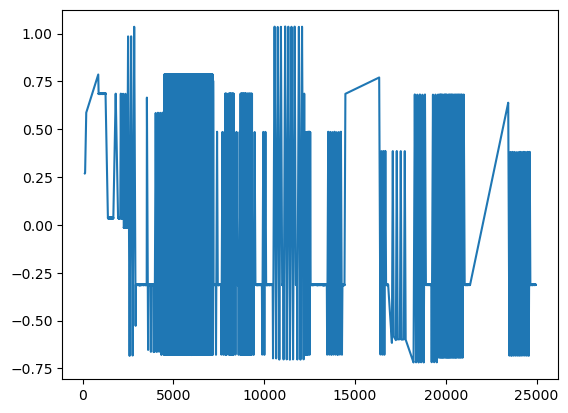

In [5]:
from matplotlib import pyplot as plt  # the standard plotting library

t, v = cv_meas.grab("Ewe/V")
plt.plot(t, v)

# plt.gca().set_xlim([13000, 15000])  # you can zoom in using an xaxis limit

Rather than using matplotlib to zoom in, we can also use `ixdat` to select the data before plotting:

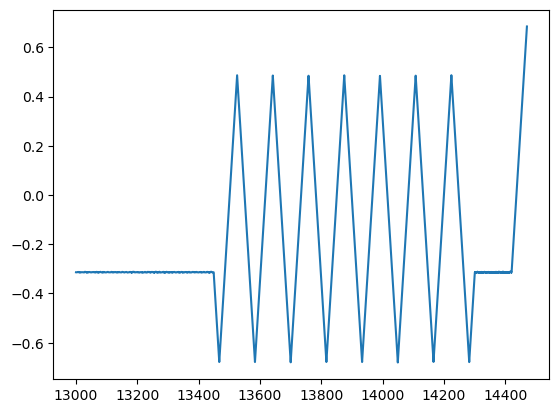

In [6]:
t, v = cv_meas.grab("Ewe/V", tspan=[13000, 15000])
plt.plot(t, v)

Beter yet, we can use ixdat to plot it for us directly.

[<Axes: xlabel='time / [s]', ylabel='Ewe/V'>, <Axes: ylabel='<I>/mA'>]

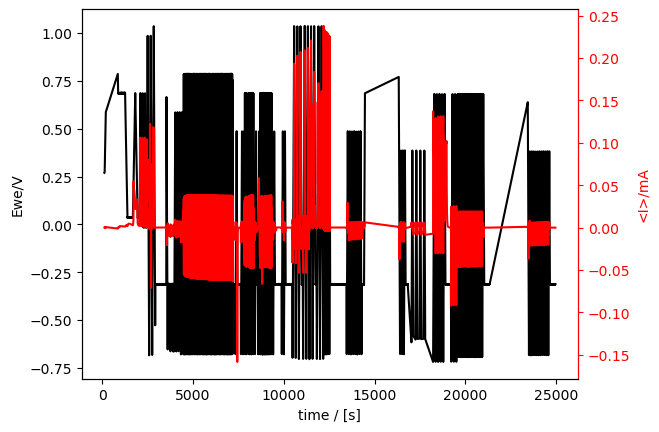

In [7]:
cv_meas.plot_measurement()   # plot_measurement() plots data on a time axis.

A few things to notice:
- Potential is on the left y-axis and current on the right, so we have all the essential electrochemistry info! But what if we wanted to plot something else?
- It's the whole data set. That is a lot. 7 hours worth!
- We didn't specify the colors (black for potential and red for current). `ixdat` guessed that for us.
- The reference electrode potential is not calibrated
- There are holes in the data (for example at 23000 s)

Every object in ixdat is (should be!) documented. Including the `plot_measurement` method. So you can check out what it does using python's `help()` function. This addressess several of the points above:

In [8]:
help(cv_meas.plot_measurement)

Help on method plot_measurement in module ixdat.plotters.ec_plotter:

plot_measurement(*, measurement=None, tspan=None, U_name=None, J_name=None, U_color=None, J_color=None, V_str=None, J_str=None, V_color=None, axes=None, **plot_kwargs) method of ixdat.plotters.ec_plotter.ECPlotter instance
    Plot two variables on two y-axes vs time
    
    All arguments are optional. By default it plots potential in black on the left
    y-axis and current in red on the right y-axis, using data from its entire
    measurement. The axes are colored to match the traces and labeled with the
    respective series names.
    
    Args:
        measurement (Measurement): The measurement to plot, if not the one the
            plotter was initiated with.
        tspan (iter of float): The timespan (wrt to measurement.tstamp) to plot.
        axes (list of matplotlib.Axis): Two axes to plot on, if not the default
            new twinx()'d axes. axes[0] is for `U_name` and axes[1] for `J_name`.
        U_n

Awesome, that answers most of our questions!

Play with the plot customization, using e.g. tspan, V_color, J_color, and kwargs like linestyle

[<Axes: xlabel='time / [s]', ylabel='Ewe/V'>, <Axes: ylabel='<I>/mA'>]

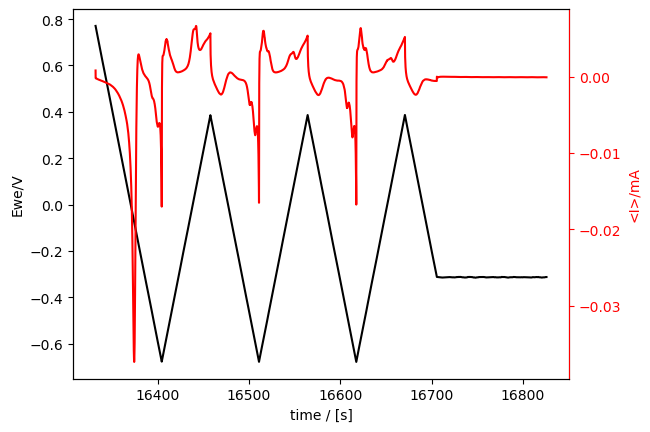

In [9]:
cv_meas.plot_measurement(
    tspan=[16000, 17000],   # comment out or uncomment this and following lines!
    # V_color="blue",
    # linestyle="--",
)

With regards to the missing parts of the dataset, those are in other files and we will get to it in a bit.

First, the reference electrode potential. This is managed with the `calibrate_RE` method with takes a number `RE_vs_RHE` as its argument. This is the potential of the *reference electrode* on the RHE scale (not the reverse).

In [10]:
cv_meas.calibrate_RE(RE_vs_RHE=0.715)  # this calibrates the reference electrode potential!

Now, if we plot a measurement, it is calibrated!

[<Axes: xlabel='time / [s]', ylabel='$U_{RHE}$ / [V]'>,
 <Axes: ylabel='<I>/mA'>]

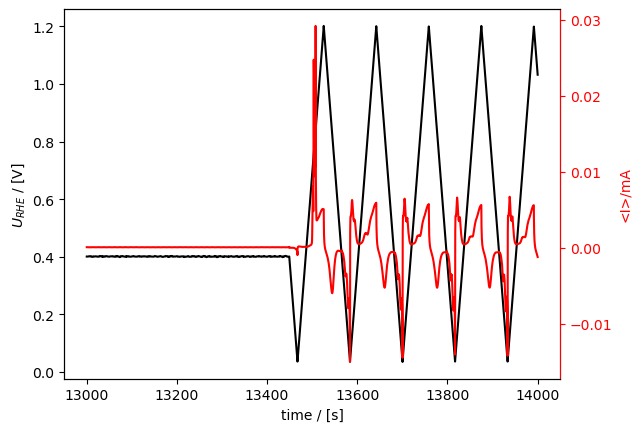

In [11]:
cv_meas.plot_measurement(
    tspan=[13000, 14000]
)
# how would you plot uncalibrated potential in a measurement that has been calibrated? (see help(plot_measurement))

Appending data from multiple measurements
---------------------------------------------------------------

The main value proposition of ixdat is to facilitate combining datasets. 
This is done with the `+` operator. 

Biologic EC-Lab measurements are a perfect example of where this is necessary. EC-Lab makes it easy to build looped techniques, but saves each sub-technique to its own file. Here, we loop between zero-current (OCP), scanning (CVA), and constant-current (CP) techniques. The `cv_meas` object we've worked with so far only has the CVA data.

First, let's load the OCP and CP techniques and plot them seperately:

[<Axes: xlabel='time / [s]', ylabel='Ewe/V'>, <Axes: ylabel='I/mA'>]

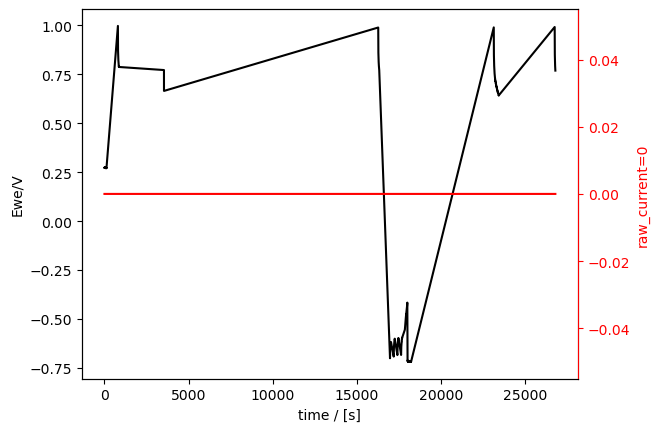

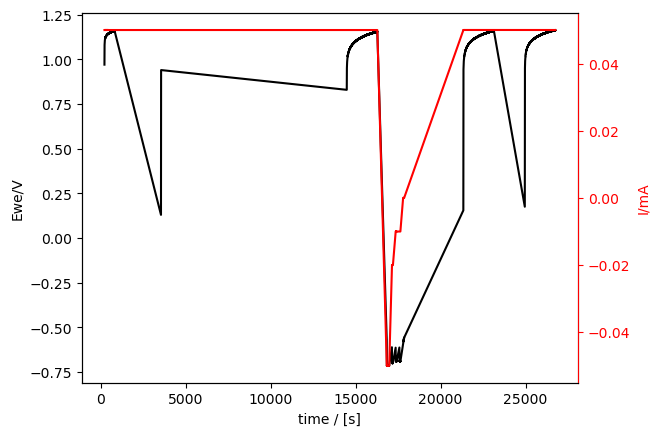

In [12]:
ocp_meas = Measurement.read(
    data_directory / "01_demo_02_OCV_C01.mpt", reader="biologic"
)
ocp_meas.plot_measurement()

cp_meas = Measurement.read(
    data_directory / "01_demo_04_CP_C01.mpt", reader="biologic"
)
cp_meas.plot_measurement()

There are also clearly holes in those data sets (much bigger holes, since most of the measurement time was in CVA).

To get the combined dataset, we append the three individual datasets using `+`, like this:

[<Axes: xlabel='time / [s]', ylabel='$U_{RHE}$ / [V]'>,
 <Axes: ylabel='raw_current'>]

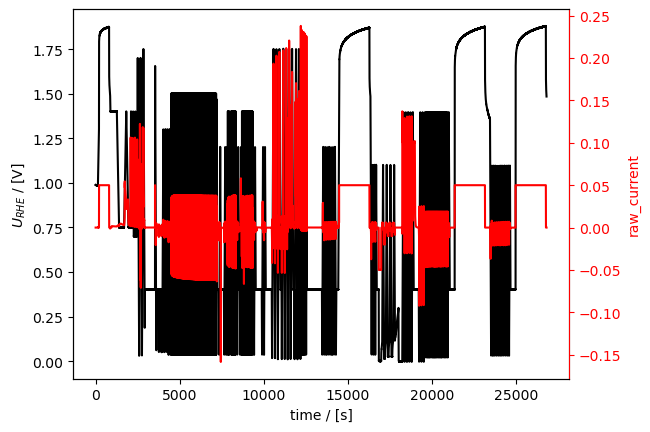

In [13]:
combined_meas = cv_meas + ocp_meas + cp_meas
# and, we plot it right away to check if it worked:
combined_meas.plot_measurement()

Here is a zoom-in on a section that includes all data from all three sub-techniques (first CP, then OCP, then CVA):

[<Axes: xlabel='time / [s]', ylabel='$U_{RHE}$ / [V]'>,
 <Axes: ylabel='raw_current'>]

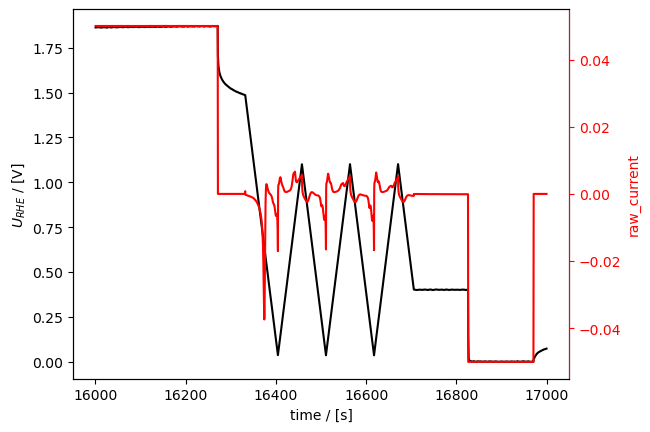

In [14]:
combined_meas.plot(tspan=[16000, 17000])

The individual measurement are accessible through the combined measurement with it's attribute `component_measurements`:

In [15]:
combined_meas.component_measurements

[ECMeasurement(id=3, name='01_demo_04_CP_C01.mpt'),
 ECMeasurement(id=1, name='01_demo_03_CVA_C01.mpt'),
 ECMeasurement(id=2, name='01_demo_02_OCV_C01.mpt')]

If you need one of them out again, you can use indexing. In python, indexing is done with square brackets and starts from `0`, so indexing with `2` gives you the third one. In the `combined_meas.component_measurements` list above, the third element is the CP measurement:

In [16]:
part = combined_meas.component_measurements[2]
part

ECMeasurement(id=2, name='01_demo_02_OCV_C01.mpt')

This component measurement naturally still has all the `ECMeasurement` attributes like its plotter:

[<Axes: xlabel='time / [s]', ylabel='Ewe/V'>, <Axes: ylabel='raw_current=0'>]

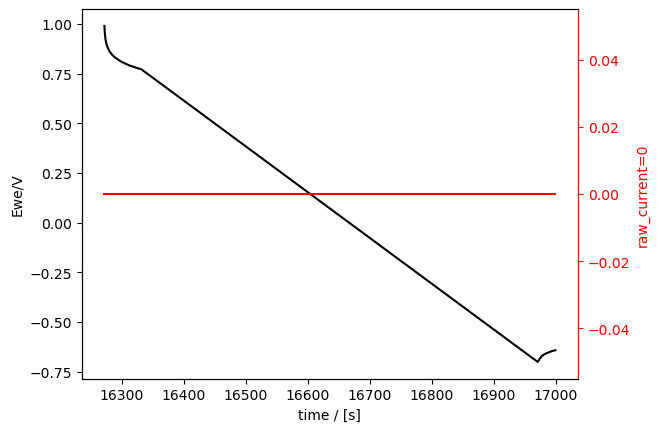

In [17]:
part.plot_measurement(tspan=[14400, 17000])

Saving to ixdat
---------------------
`ixdat` is built around a relational model of data, and provides a backend that saves data in that structure. This is under development, and for now is a folder on your computer. In the future it will be an SQL database.

Right now, there aren't really any advantages compared to exporting and reading from text files. In the future it will provide all the power of relational databases and SQL for organizing your experimental data. This is under development. This part of the tutorial should therefore mainly be considered a teaser.

The folder is present in your home directory in the folder `ixdat`, and a sub-folder defined by the `project_name` parameter (default is "test"). To change the project name, use the `change_database` function of `ixdat.db`. The first argument is the type of database and for now can only be "directory".

In [18]:
from ixdat.db import change_database

change_database("directory", project_name="21B19_demo")

Here, we show saving the measurement. First we give it a name to save with, "extended_platinum_ec", and then we save it with the `save()` method:

In [19]:
combined_meas.name = "extended_platinum_ec"

# save() returns a number, the id of the measurement, which we here name `m_id` for use later:
m_id = combined_meas.save()  

print(f"saved with id={m_id}")  # this kind of f-string is a nice way to print an object to the terminal

saved with id=28


Take a quick look at what was saved in your ixdat/<project_name> folder.

To load a measurememt when you know it's id (the only way implemented so far), use `Measurement.get()`:

In [20]:
del(combined_meas)  # delete the original one to prove we're really loading

loaded_meas = Measurement.get(m_id)  # load the saved measurement

And, let's plot it to prove we loaded the same one.

Notice how fast it loaded, compared to reading the original files.
Notice also that the potential is still calibrated to the RHE scale, so it includes metadata we added here using `ixdat`

[<Axes: xlabel='time / [s]', ylabel='$U_{RHE}$ / [V]'>,
 <Axes: ylabel='raw_current'>]

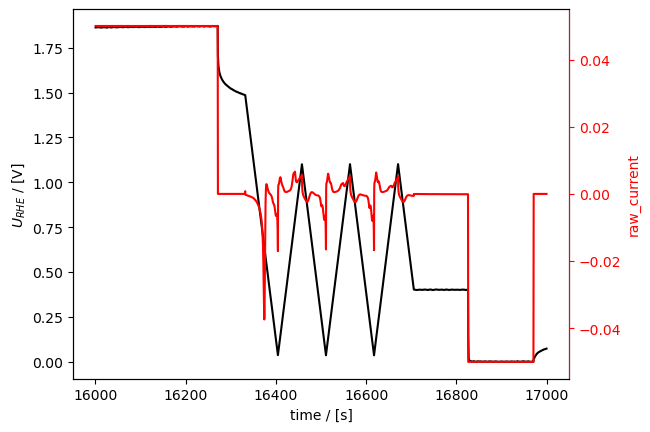

In [21]:
loaded_meas.plot_measurement(
    tspan=[16000, 17000],  # A tspan of the measurement with all three sub-techniques: CP, OCP, and CVA.
)

Selecting data and adjusting the starting time
-------------------------------------------------------------

An annoying thing about the data plotted above is that the interesting parts - the experiments - are many thousand seconds into the measurement. It would be much nicer for thes experiments to start at 0.

Another annoying thing is that we have to keep telling it tspan for plotting (`plot_measurement()`) and grabbing (`grab()`) data, even if we're really just interested in this one range.

Here we show how to select the range and redefine t=0. 

First, selecting the range. This is done with the `cut()` method. Here, we cut a part of the full measurement and call it `co_strip`:

[<Axes: xlabel='time / [s]', ylabel='$U_{RHE}$ / [V]'>,
 <Axes: ylabel='<I>/mA'>]

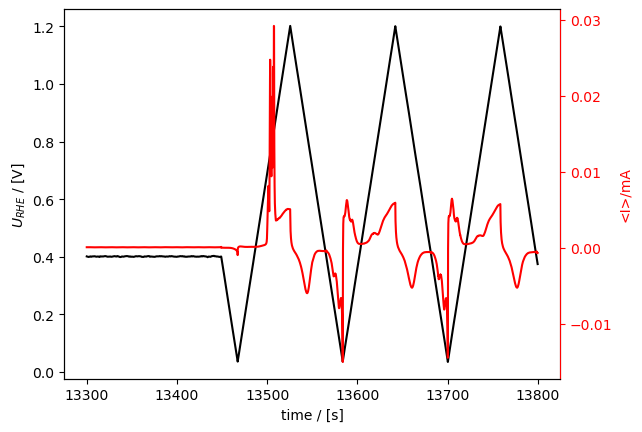

In [22]:
co_strip = loaded_meas.cut(tspan=[13300, 13800])

co_strip.plot_measurement()

In [23]:
t_0 = co_strip.t[0]
print(f"the time starts at t={t_0}, which is annoying")

the time starts at t=13300.05678509103, which is annoying


And now, to fix the start time, we just change the measurement's `tstamp`:

and now it starts at t=0.0, which is nice!


[<Axes: xlabel='time / [s]', ylabel='$U_{RHE}$ / [V]'>,
 <Axes: ylabel='<I>/mA'>]

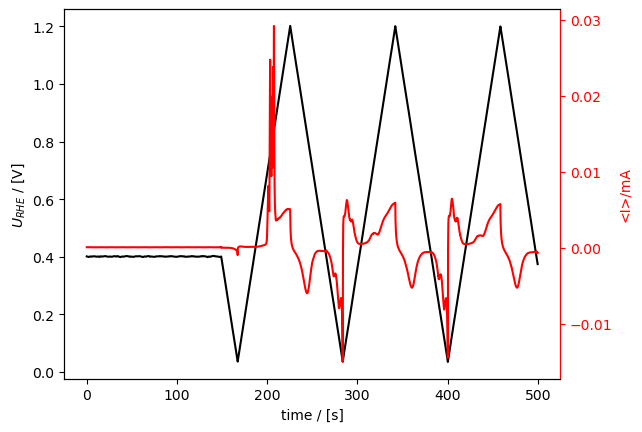

In [24]:
co_strip.tstamp += co_strip.t[0]
t_0 = co_strip.t[0]
print(f"and now it starts at t={t_0}, which is nice!")

co_strip.plot()

Here, we plot it again vs time (right subplot) to show that the time is shifted. 
In this code block I also show how you can 
- use an Axis as an argument, in order to get the subplots. 
- how to plot current vs potential (`plot_vs_potential()`). 
- Also, how to save the figure.

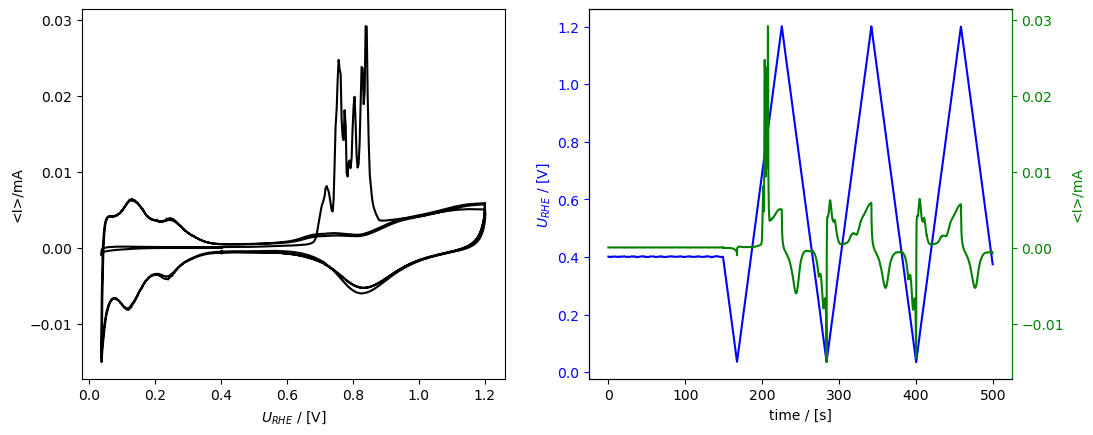

In [25]:
from matplotlib import pyplot as plt

fig, [ax1, ax2] = plt.subplots(1, 2)
fig.set_figwidth(fig.get_figheight()*2.5)

co_strip.plot_measurement(
    axes=[ax2, ax2.twinx()], U_color="b", J_color="g"
)

co_strip.plot_vs_potential(ax=ax1)
fig.savefig("01_cool_subplots.png")

Here we select a second interesting section and change its tstamp in one step using the `t_zero` argument to `cut()`

[<Axes: xlabel='time / [s]', ylabel='$U_{RHE}$ / [V]'>,
 <Axes: ylabel='raw_current'>]

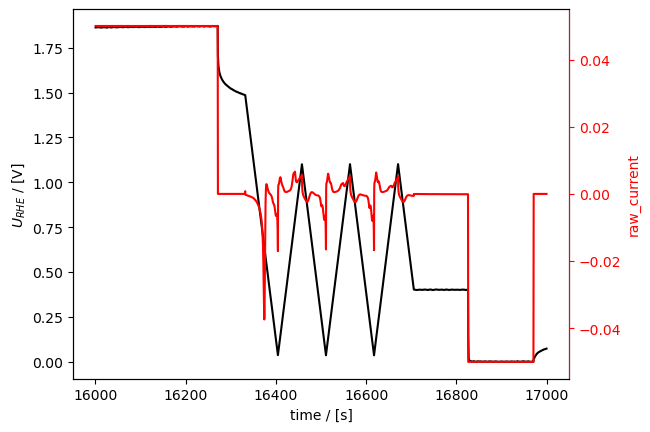

In [26]:
oxide_reduction = loaded_meas.cut(
    tspan=[16000, 17000], #t_zero="start"
)

oxide_reduction.plot_measurement()

Exporting
-------------

Exporting is as simple as using a measurement's `export()` method with the desired file name.
Here we export both interesting parts that we selected above from the EC measurement:

In [27]:
export_dir = Path("./exports")
if not export_dir.exists():
    export_dir.mkdir()

co_strip.export("./exports/co_strip.csv")
oxide_reduction.export("./exports/oxide_reduction.csv")

The reader for the ixdat-exported files is "ixdat". Here we show that ixdat can read what it exports by reading and plotting one.

skipping the following line:
ixdat version = 0.2.7.dev1

skipping the following line:
backend_name = BackendBase(none, address=none)



[<Axes: xlabel='time / [s]', ylabel='$U_{RHE}$ / [V]'>,
 <Axes: ylabel='<I>/mA'>]

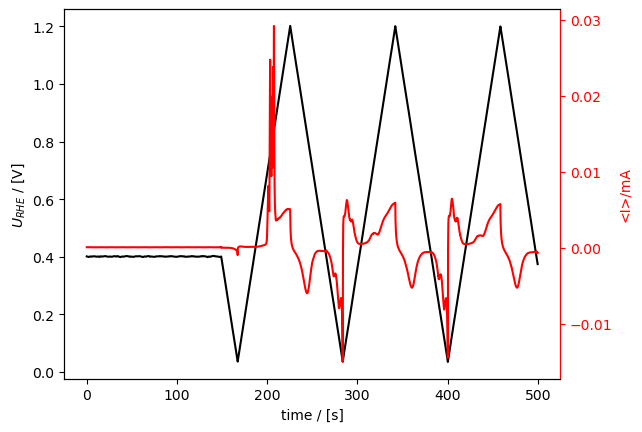

In [28]:
loaded_from_export = Measurement.read(export_dir / "co_strip.csv", reader="ixdat")
loaded_from_export.plot()

The end
----------
The files exported in this tutorial are used in the tutorial "**Comparing cycles of a cyclic voltammogram**". See you there!